<a href="https://colab.research.google.com/github/mzolneczko/DSP_lab2_20251115/blob/main/DSP_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

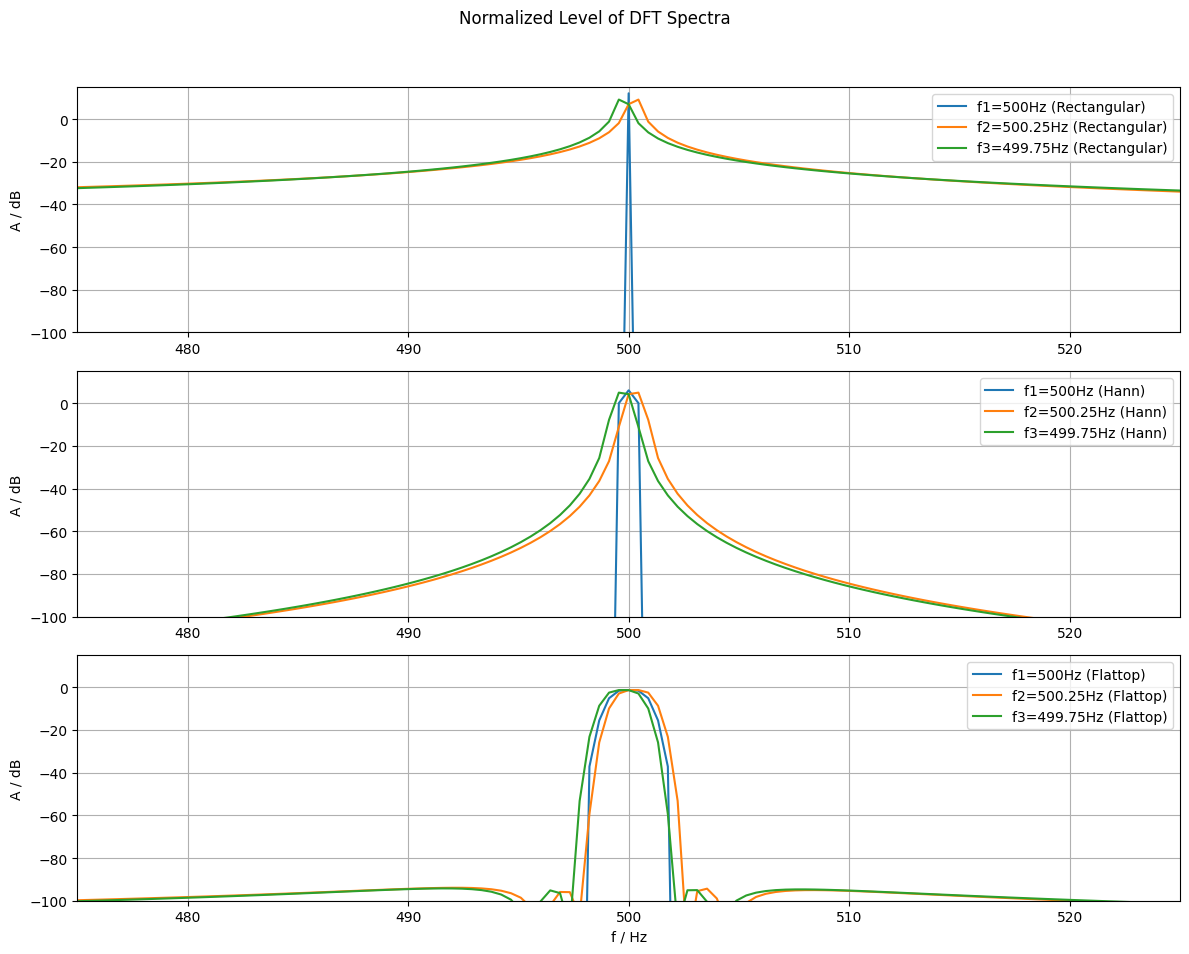

/tmp/ipython-input-3812804089.py:35: RuntimeWarning: divide by zero encountered in log10
  return Omega, 20 * np.log10(W)


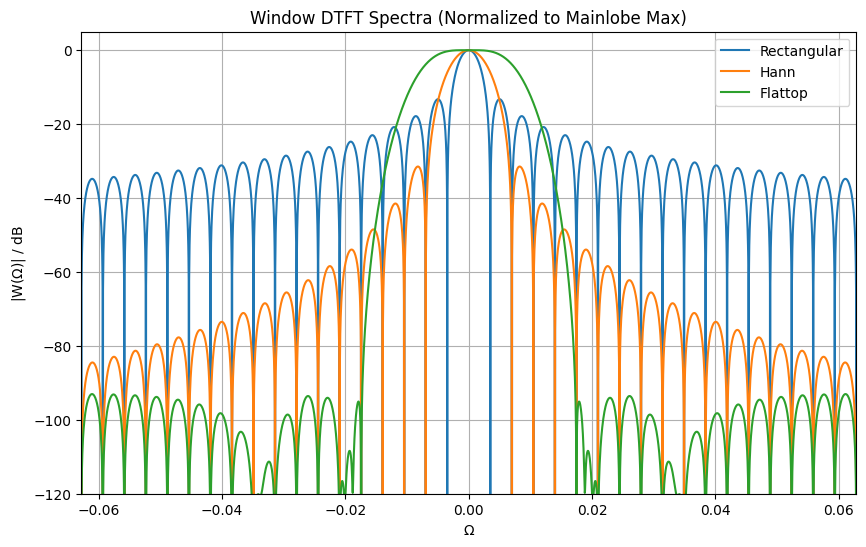

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

f1, f2, f3 = 500, 500.25, 499.75
fs = 800
N = 1800
amp_max = 4

k = np.arange(N)
x1 = amp_max * np.sin(2 * np.pi * f1 / fs * k)
x2 = amp_max * np.sin(2 * np.pi * f2 / fs * k)
x3 = amp_max * np.sin(2 * np.pi * f3 / fs * k)

wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

def fft2db(X, N_val):
    """Returns normalized DFT level in dB independent of N."""
    Xtmp = 2 / N_val * X
    Xtmp[0] *= 0.5
    if N_val % 2 == 0:
        Xtmp[N_val // 2] *= 0.5
    return 20 * np.log10(np.abs(Xtmp))

def winDTFTdB(w):
    """Returns quasi-DTFT normalized to mainlobe maximum."""
    Nz = 100 * w.size
    W = fftshift(fft(w, n=Nz))
    W = np.abs(W)
    W /= np.max(W)
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi
    return Omega, 20 * np.log10(W)

df = fs / N
f_axis = np.arange(N) * df

plt.figure(figsize=(12, 10))
windows = [(wrect, 'Rectangular'), (whann, 'Hann'), (wflattop, 'Flattop')]

for i, (win, name) in enumerate(windows):
    plt.subplot(3, 1, i+1)
    plt.plot(f_axis, fft2db(fft(x1 * win), N), label=f'f1={f1}Hz ({name})')
    plt.plot(f_axis, fft2db(fft(x2 * win), N), label=f'f2={f2}Hz ({name})')
    plt.plot(f_axis, fft2db(fft(x3 * win), N), label=f'f3={f3}Hz ({name})')
    plt.xlim(475, 525)
    plt.ylim(-100, 15)
    plt.ylabel('A / dB')
    plt.legend()
    plt.grid(True)
plt.xlabel('f / Hz')
plt.suptitle('Normalized Level of DFT Spectra')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(10, 6))
for win, name in windows:
    Omega, W_db = winDTFTdB(win)
    plt.plot(Omega, W_db, label=name)

plt.xlim(-np.pi/50, np.pi/50)
plt.ylim(-120, 5)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.title('Window DTFT Spectra (Normalized to Mainlobe Max)')
plt.legend()
plt.grid(True)
plt.show()